# OPISNA STATISTIKA U PYTHONU

## Uvod

<div style = "text-align: justify"> <b style = "color : red">Opisna (deskriptivna)</b> statistika prvi je korak u analizi varijabli rezultata istraživanja. Ona uključuje niz statističkih parametara koji opisuju varijable. Kao prvi korak u prikazu podataka koriste se upravo parametri opisne statistike i slikovni prikazi raspodjela podataka. Glavna je zadaća deskriptivne statistike proučvanje, opis, prikaz i enkapsulacija glavnih svojstava danoga skupa podataka korištenog u pojedinom istraživanju. Temeljito izučavanje podataka metodama opisne statistike pomaže pri boljem razumijevanju danoga skupa podataka te daljnim istraživanjem dobivenih rezultata o cjelokupnoj populaciji iz koje su promatrani podaci slučajno uzorkovani.</div>

## Metode opisne statistike

<div style = "text-align: justify">Metode opisne statistike kojima uočavamo karakteristike, pravilnosti ili pak nepravilnosti danoga skupa podataka mogu biti numeričke ili grafičke. Za kvalitetnu analizu skupa podataka potrebno je koristiti metode obiju skupina prikladne tipu podataka s kojim radimo. </div>

Većina numeričkih mjera korištenih u deskriptivnoj statistici može se podijeliti u dvije velike skupine:
1. Mjere centralne tendencije
2. Mjere raspršenja

U **mjere centralne tendencije** ubrajamo:
* Aritmetičku sredinu
* Geometrijsku sredinu
* Harmonijsku sredinu
* Medijan
* Mod

U **mjere raspršenja** ubrajamo: 
* Raspon
* Interkvartil
* Uzoračku varijancu
* Standardnu devijaciju

Osim prethodno navedenih mjera, za dublje istraživanje i shvaćanje svojstava danog skupa podataka koriste se mnogi grafički prikazi i modeli. **Vizualna reprezentacija podataka** često pomaže da uočimo dodatne detalje u danome skupu podataka i dobijemo bolju percepciju o skupu u cjelosti, a postiže se pomoću sljedećih grafova:
* Dijagram točaka
* Histogram
* *Stem-and-leaf* dijagram
* Stupčasti dijagram
* Strukturni dijagram
* Dijagram pravokutnika

<div style = "text-align : justify">U ovoj ćemo bilježnici proučiti korištenje prethodno opisanih numeričkih i vizualizacijskih metoda opisne statistike pomoću prikladnih Pytonovih paketa na konkretnom skupu podataka. Dakle, <b>analizirat ćemo podatke u konkretnome skupu podataka</b>, donijeti osnovne zaključke o danome skupu te ga grafički prikazati.</div> 

## Analiza sentimenta *Twitter* objava

<div style = "text-align:justify">Analiza sentimenta (ili istraživanje mišljenja) tehnika je obrade prirodnog jezika koja se koristi za određivanje jesu li tekstualni podaci pozitivni, negativni ili neutralni. Glavna je zadaća analize sentimenta iz teksta enkapsulirati emociju koju on prenosi. Važnost ove tehnike posebno se ističe pri donošenju poslovnih odluka koje uvelike ovise o evaluaciji mišljenja krajnjih korisnika i kupaca.</div>

<div style = "text-align : justify"> Promatrat ćemo skup podataka koji sadrži preko 27000 objava s popularne društvene mreže <i>Twitter</i> podijeljenih u tri kategorije. <i>Tweetovi</i> su analizom sentimenta podijeljeni na one koji prenose negativnu emociju, one koji prenose pozitivnu emociju te neutralne. Tehnikama opisanim u prethodnom poglavlju istražimo te vizualizirajmo dani skup podataka.</div>

Za početak skidamo datoteku s podacima s repozitorija na *GitHub*-u i spremamo je u lokalnu memoriju.

In [1]:
def skini(url: str, datoteka: str):
    import urllib.request as rq, pathlib
    with rq.urlopen(url) as konekcija:
        pathlib.Path(datoteka).write_bytes(konekcija.read())

In [2]:
podaci = 'https://raw.githubusercontent.com/anazebi/softver/main/Tweets.csv'
skini(podaci, 'podaci.csv')

Sada ćemo preuzete podatke učitati u `DataFrame` koristeći biblioteku `Pandas`.

In [3]:
import pandas as pd

df_podaci = pd.read_csv('podaci.csv', on_bad_lines = 'warn')

Promotrimo sada oblik i formu učitanih podataka na nekoliko konkretnih primjera:

In [4]:
df_podaci.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
# %pip install termcolor          # ukoliko nemate instaliran paket termcolor odkomentirajte ovu liniju
from termcolor import colored     # ovaj nam paket omogućava ispis u boji

print(colored('\nU tablici podataka nalazi se {} redak i {} stupca.'.format(df_podaci.shape[0], df_podaci.shape[1]), 'red', attrs = ['bold']))


U tablici podataka nalazi se 27481 redak i 4 stupca.


Uočavamo da spremljeni podaci imaju sljedeća svojstva:
* Jedinstveni identifikator
* Tekst objave
* Ključne riječi na osnovu kojih je provedena analiza sentimenta
* Sentiment

Promotrimo sadrže li svi dani podaci ključne riječi.

In [6]:
print(colored(df_podaci['selected_text'].isnull().value_counts(), 'green'))

False    27480
True         1
Name: selected_text, dtype: int64


Budući da gotovo svi podaci u stupcu `selected_text` sadrže ključne riječi na osnovu kojih je izvršena analiza sentimenta, zaključujemo da ćemo daljnje istraživanje podataka provoditi proučavajući za svaku objavu upravo ovo svojstvo te sam tekst objave. Promatranu tablicu smanjujemo brisanjem stupca `textID` s identifikatorom objave, budući da nam ovo svojstvo neće koristiti pri daljnjoj anlizi.

In [7]:
df_podaci = df_podaci.drop(columns = 'textID')

Promotrimo sada distribuciju danih podataka u skupine definirane analizom sentimenta. Pritom koristimo Pythonovu biblioteku `seaborn` često korištenu za grafičku vizualizaciju podataka u statističkim istraživanjima. Za početak kreirajmo **stupčasti dijagram frekvencija** danoga skupa podataka.

Text(0.5, 1.0, 'Distribucija klasa dobivena analizom sentimenta')

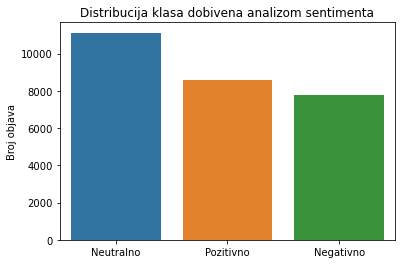

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.rcParams['figure.max_open_warning'] = 50
#%matplotlib agg

x = df_podaci.sentiment.value_counts()     # funkcija value_counts() pronalazi jedinstvene vrijednosti stupca df_podaci.sentiment te svakoj pridružuje ukupni broj njenog pojavljivanja u stupcu

fig, ax = plt.subplots() 

sns.barplot(x = x. index, y = x)

plt.gca().set_ylabel('Broj objava');
plt.gca().set(xticklabels = ['Neutralno', 'Pozitivno', 'Negativno'])
plt.title('Distribucija klasa dobivena analizom sentimenta')

Za još učinkovitiju vizualizaciju konstruirajmo i **strukturni dijagram**.

Text(0.5, 1.0, 'Strukturni dijagram')

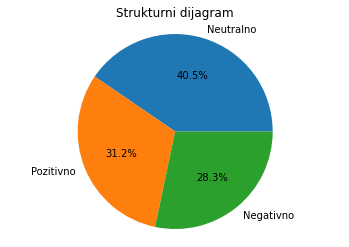

In [9]:
labels = ['Neutralno', 'Pozitivno', 'Negativno']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, autopct = '%1.1f%%')
ax.axis('equal')                                      # ovom naredbom osiguravamo da strukturni dijagram bude kružnica
ax.set_title('Strukturni dijagram')

Iz prethodnih se dijagrama može jasno vidjeti da je najveći udio objava iz promatranog skupa podataka klasificiran kao neutralan (40.5%), potom pozitivan (31.2%) te naposlijetku negativan (28.3%).

### Obogaćivanje podataka i vizualizacija

Radi jednostavnije analize obilježja i strukture promatranog skupa podataka, svakome njegovom elementu dodajemo nova, zanimljiva i praktična obilježja. Za početak stvaramo stupce `text_count` i `selected_text_count` koji će za svaku objavu sadržavati informaciju o broju riječi koje ona sadrži u svome sadržaju, odnosno o broju riječi koje su bile potrebne da bi se za nju provela analiza sentimenta. 

In [10]:
# stvaramo stupac za broj riječi u objavi
df_podaci['text_count'] = df_podaci['text'].apply(lambda n: len(str(n).split()))

#stvaramo stupac za broj rijeci koje su bile potrebne za analizu sentimenta
df_podaci['selected_text_count'] = df_podaci['selected_text'].apply(lambda n: len(str(n).split()))

<div style = "text-align:justify">Promotrimo sada <b>funkcije gustoće</b> broja riječi u objavi, odnosno broja riječi koje su bile potrebne za provođenje analize sentimenta za svaku od tri definirane kategorije podataka.</div>

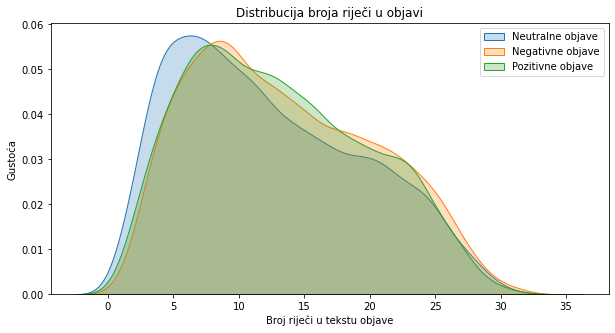

In [11]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.kdeplot(df_podaci['text_count'][df_podaci['sentiment'] == 'neutral'], shade = True, label = 'Neutralne objave', legend = True)
sns.kdeplot(df_podaci['text_count'][df_podaci['sentiment'] == 'negative'],  shade = True, label = 'Negativne objave', legend = True)
sns.kdeplot(df_podaci['text_count'][df_podaci['sentiment'] == 'positive'], shade = True, label = 'Pozitivne objave', legend = True)

plt.title('Distribucija broja riječi u objavi')
plt.gca().set_ylabel('Gustoća')
plt.gca().set_xlabel('Broj riječi u tekstu objave')

plt.legend()

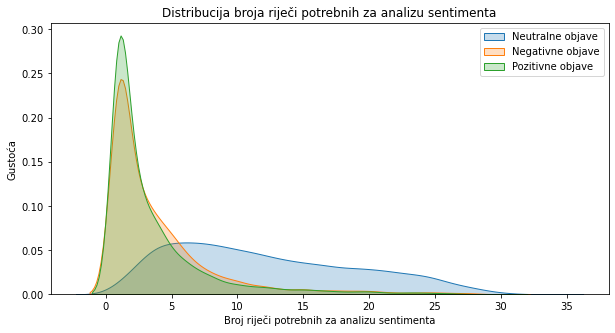

In [12]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.kdeplot(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'neutral'], shade = True, label = 'Neutralne objave', legend = True)
sns.kdeplot(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'negative'], shade = True, label = 'Negativne objave', legend = True)
sns.kdeplot(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'positive'], shade = True, label = 'Pozitivne objave', legend = True)

plt.title('Distribucija broja riječi potrebnih za analizu sentimenta')
plt.gca().set_ylabel('Gustoća')
plt.gca().set_xlabel('Broj riječi potrebnih za analizu sentimenta')

plt.legend()

<div style = "text-align: justify">Iz ovoga grafa jasno zaključujemo da je za karakterizaciju objave kao neutralne bio potreban značajno veći broj riječi nego za klasifikaciju pozitivnih i negativnih objava. Ovakvo saznanje motivira nas na istraživanje odnosa broja riječi u objavi određene klase te broja riječi potrebnih za njenu klasifikaciju. Izračunajmo stoga za svaku od klasa prosječan broj riječi u objavi te prosječan broj riječi potreban za klasifikaciju objave, kao i ostale numeričke mjere opisne statistike spomenute u prvom poglavlju.</div>

In [13]:
def aritmeticka_sredina(vrijednosti):
    suma = sum(vrijednosti)
    duljina = len(vrijednosti)
    return suma/duljina

def geometrijska_sredina(vrijednosti):
    produkt = 1
    for x in vrijednosti:
        produkt = produkt * x
    duljina = len(vrijednosti)
    return produkt ** (1/duljina)

def harmonijska_sredina(vrijednosti):
    duljina = len(vrijednosti)
    suma = 0
    for x in vrijednosti:
        suma = suma + 1/x
    return duljina / suma
    
def medijan(vrijednosti):
    duljina = len(vrijednosti)
    sortirane_vrijednosti = sorted(vrijednosti)
    midpoint = duljina // 2
    if duljina % 2 == 1:
        return sortirane_vrijednosti[midpoint]
    else:
        return aritmeticka_sredina([sortirane_vrijednosti[midpoint-1], sortirane_vrijednosti[midpoint]])

Text(0, 0.5, 'Broj riječi potrebnih za klasifikaciju')

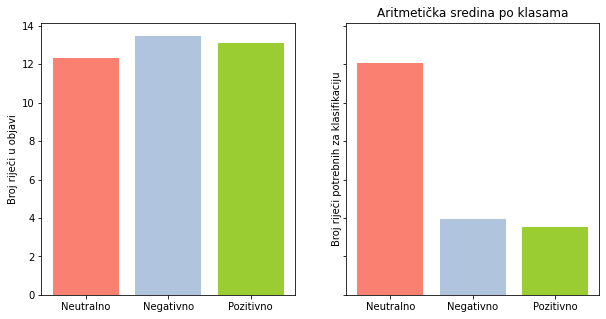

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True) 

as_neutral = aritmeticka_sredina(df_podaci['text_count'][df_podaci['sentiment'] == 'neutral'])
as_negative = aritmeticka_sredina(df_podaci['text_count'][df_podaci['sentiment'] == 'negative'])
as_positive = aritmeticka_sredina(df_podaci['text_count'][df_podaci['sentiment'] == 'positive'])

as_neutral2 = aritmeticka_sredina(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'neutral'])
as_negative2 = aritmeticka_sredina(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'negative'])
as_positive2 = aritmeticka_sredina(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'positive'])

plt.title('Aritmetička sredina po klasama')

ax1.bar(['Neutralno', 'Negativno', 'Pozitivno'], [as_neutral, as_negative, as_positive], color = ['salmon', 'lightsteelblue', 'yellowgreen'])
ax1.set_ylabel('Broj riječi u objavi', fontsize = 10);

ax2.bar(['Neutralno', 'Negativno', 'Pozitivno'], [as_neutral2, as_negative2, as_positive2], color = ['salmon', 'lightsteelblue', 'yellowgreen'])
ax2.set_ylabel('Broj riječi potrebnih za klasifikaciju', fontsize = 10)

Text(0, 0.5, 'Broj riječi potrebnih za klasifikaciju')

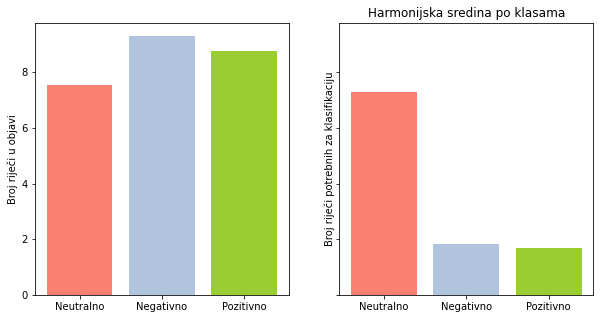

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True) 

as_neutral = harmonijska_sredina(df_podaci['text_count'][df_podaci['sentiment'] == 'neutral'])
as_negative = harmonijska_sredina(df_podaci['text_count'][df_podaci['sentiment'] == 'negative'])
as_positive = harmonijska_sredina(df_podaci['text_count'][df_podaci['sentiment'] == 'positive'])

as_neutral2 = harmonijska_sredina(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'neutral'])
as_negative2 = harmonijska_sredina(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'negative'])
as_positive2 = harmonijska_sredina(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'positive'])

plt.title('Harmonijska sredina po klasama')

ax1.bar(['Neutralno', 'Negativno', 'Pozitivno'], [as_neutral, as_negative, as_positive], color = ['salmon', 'lightsteelblue', 'yellowgreen'])
ax1.set_ylabel('Broj riječi u objavi', fontsize = 10);

ax2.bar(['Neutralno', 'Negativno', 'Pozitivno'], [as_neutral2, as_negative2, as_positive2], color = ['salmon', 'lightsteelblue', 'yellowgreen'])
ax2.set_ylabel('Broj riječi potrebnih za klasifikaciju', fontsize = 10)

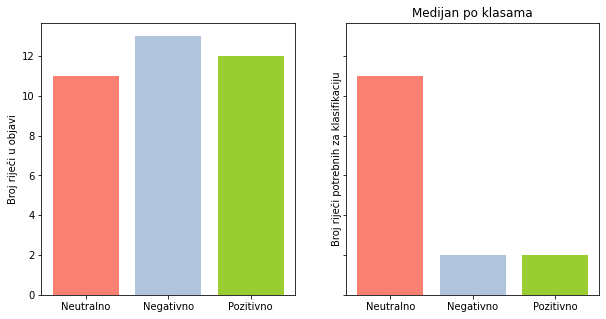

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True) 

as_neutral = medijan(df_podaci['text_count'][df_podaci['sentiment'] == 'neutral'])
as_negative = medijan(df_podaci['text_count'][df_podaci['sentiment'] == 'negative'])
as_positive = medijan(df_podaci['text_count'][df_podaci['sentiment'] == 'positive'])

as_neutral2 = medijan(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'neutral'])
as_negative2 = medijan(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'negative'])
as_positive2 = medijan(df_podaci['selected_text_count'][df_podaci['sentiment'] == 'positive'])

plt.title('Medijan po klasama')

ax1.bar(['Neutralno', 'Negativno', 'Pozitivno'], [as_neutral, as_negative, as_positive], color = ['salmon', 'lightsteelblue', 'yellowgreen'])
ax1.set_ylabel('Broj riječi u objavi', fontsize = 10);

ax2.bar(['Neutralno', 'Negativno', 'Pozitivno'], [as_neutral2, as_negative2, as_positive2], color = ['salmon', 'lightsteelblue', 'yellowgreen'])
ax2.set_ylabel('Broj riječi potrebnih za klasifikaciju', fontsize = 10)

plt.show()

<div style = "text-align:justify">Iz prethodnih je dijagrama lako uočiti da su sve izračunate mjere za broj riječi u objavi te broj riječi potrebnih za provedbu analize sentimenta imale dvije zajedničke karakteristike. Objave klasificirane kao neutralne imaju gotovo identične vrijednosti svih mjera. Primjerice, prosječan broj riječi u objavama okarakteriziranim neutralnima gotovo je identičan prosječnom broju riječi potrebnih za takvu karakterizaciju objave. Zaključujemo stoga da je provođenje analize sentimenta na neutralnim objavama bilo potrebno iskoristiti gotovo sve riječi sadržane u objavi. S druge strane, primjetno je da se klasifikacija pozitivnih i negativnih objava izvršavala s znantno manjim brojem riječi. Točnije, pri klasifikaciji negativnih i pozitivnih objava najčešće je sudjelovao tek mali dio riječi iz originalnog i cjelovitog sadržaja objave.</div>

<div style = "text-align:justify">Promotrimo sada koje se riječi najčešće javljaju u podacima iz različitih klasa. Međutim, da bi daljnja analiza uistinu bila učinkovita potrebno je tekst obraditi, primjerice pretvoriti sve u mala slova te ukloniti riječi koje nemaju pretjerano semantičko značenje poznate pod nazivom <i>stopwords</i>.</div>

In [17]:
import re
import nltk
from nltk.corpus import stopwords
import string

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def remove_stopwords(x):
    return [y for y in x if y not in stopwords.words('english')]

df_podaci['text'] = df_podaci['text'].apply(lambda x:clean_text(x))
df_podaci['selected_text'] = df_podaci['selected_text'].apply(lambda x:clean_text(x))

In [20]:
#potrebno je pricekati dvije-tri minute na izvrsavanje koda

from collections import Counter

df_podaci['temp_list_text'] = df_podaci['text'].apply(lambda x:str(x).split())
df_podaci['temp_list_text'] = df_podaci['temp_list_text'].apply(lambda x:remove_stopwords(x))


df_podaci['temp_list_selected'] = df_podaci['selected_text'].apply(lambda x:str(x).split())
df_podaci['temp_list_selected'] = df_podaci['temp_list_selected'].apply(lambda x:remove_stopwords(x))


df_pozitivni = df_podaci[df_podaci['sentiment'] == 'positive']
df_neutral = df_podaci[df_podaci['sentiment'] == 'neutral']
df_negative = df_podaci[df_podaci['sentiment'] == 'negative']

frekvencije_pozitivni = Counter([item for sublist in df_pozitivni['temp_list_text'] for item in sublist])
frekvencije_neutral = Counter([item for sublist in df_neutral['temp_list_text'] for item in sublist])
frekvencije_negative = Counter([item for sublist in df_negative['temp_list_text'] for item in sublist])

temp_pozitivni = pd.DataFrame(frekvencije_pozitivni.most_common(20))
temp_neutral = pd.DataFrame(frekvencije_neutral.most_common(20))
temp_negative = pd.DataFrame(frekvencije_negative.most_common(20))

temp_pozitivni.columns = ['Common_words','count']
temp_neutral.columns = ['Common_words','count']
temp_negative.columns = ['Common_words','count']

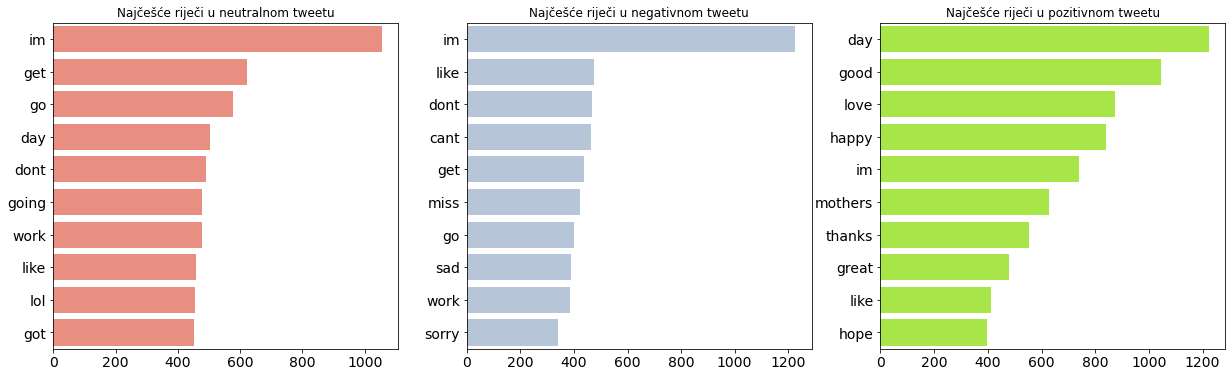

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (21, 6))
#plt.tight_layout()

sns.barplot(y = temp_neutral['Common_words'].values[:10], x = temp_neutral['count'].values[:10], ax = ax[0], color='salmon').set_title('Najčešće riječi u neutralnom tweetu')
sns.barplot(y = temp_negative['Common_words'].values[:10], x = temp_negative['count'].values[:10], ax = ax[1], color = 'lightsteelblue').set_title('Najčešće riječi u negativnom tweetu')
sns.barplot(y = temp_pozitivni['Common_words'].values[:10], x = temp_pozitivni['count'].values[:10], ax = ax[2], color = 'greenyellow').set_title('Najčešće riječi u pozitivnom tweetu')

for i in range (0,3): 
    ax[i].tick_params(axis = 'x', labelsize = 14)
    ax[i].tick_params(axis = 'y', labelsize = 14)

<div style = "text-align: justify">Iz dobivenih dijagrama zaključujemo da su za neutralne objave karakteristične riječi koje ne prenose nikakav pretjerani sentiment, primjerice <i>get, go, day</i> ili <i>work</i>. Za negativne objave karakteristične su riječi koje prenose negativan sentiment poput <i>miss, sad, sorry</i> ili <i>bad</i>, dok su u pozitivnim objavama najzastupljenije riječi <i>good, happy</i> i <i>love</i>. Promotrimo sada i koje su riječi najčešće među riječima koje su upotrebljene pri provedbi analize sentimenta te rezultate prikažimo još jednom veoma popularnom metodom za vizualizaciju podataka, pod nazivom <i>wordcloud</i>. Ova je metoda veoma zanimljiva i intuitivna, riječi napisane većim fontom imaju veću frekvenciju pojavljivanja u danome skupu riječi.</div>

In [22]:
from wordcloud import WordCloud 

#normal_words =' '.join([text for text in df_train_cisto['text'][df_train_cisto['target'] == 1]]) 

df_podaci['temp_list_selected']= df_podaci['temp_list_selected'].str.join(' ')
df_pozitivni = df_podaci[df_podaci['sentiment'] == 'positive']
df_neutral = df_podaci[df_podaci['sentiment'] == 'neutral']
df_negative = df_podaci[df_podaci['sentiment'] == 'negative']

rijeci_pozitivni = ' '.join([text for text in df_pozitivni['temp_list_selected']])
rijeci_neutral = ' '.join([text for text in df_neutral['temp_list_selected']])
rijeci_negative = ' '.join([text for text in df_negative['temp_list_selected']])

(-0.5, 799.5, 499.5, -0.5)

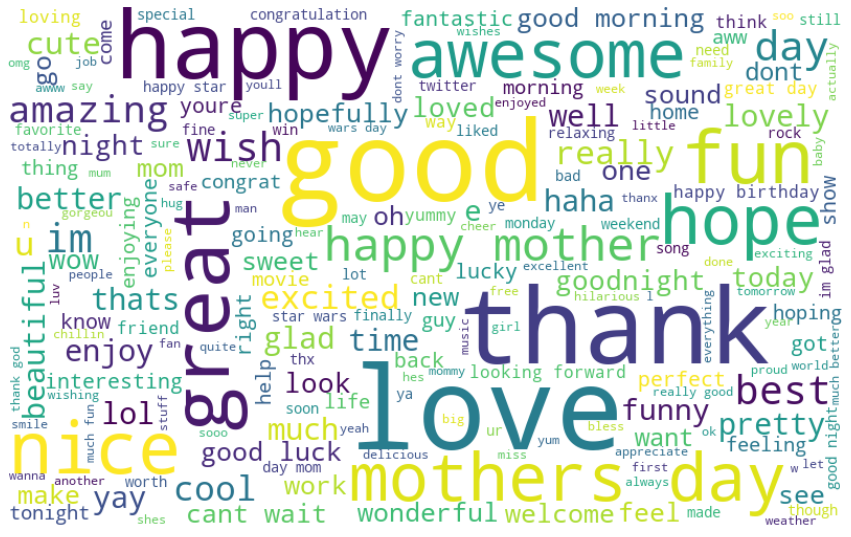

In [26]:
wordcloud = WordCloud(background_color="white",width=800, height=500, random_state=21, max_font_size=110).generate(rijeci_pozitivni) 

plt.figure(figsize=(15, 12)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 

(-0.5, 799.5, 499.5, -0.5)

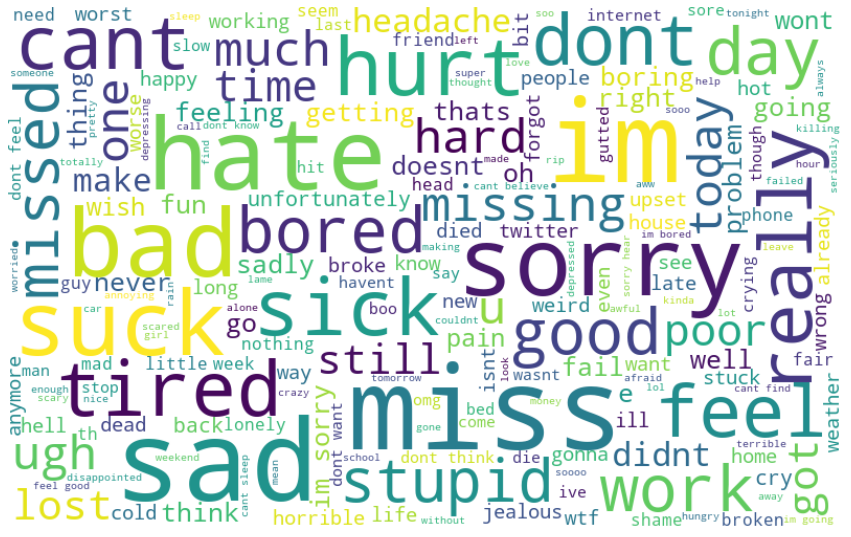

In [27]:
wordcloud = WordCloud(background_color="white",width=800, height=500, random_state=21, max_font_size=110).generate(rijeci_negative) 

plt.figure(figsize=(15, 12)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 

(-0.5, 799.5, 499.5, -0.5)

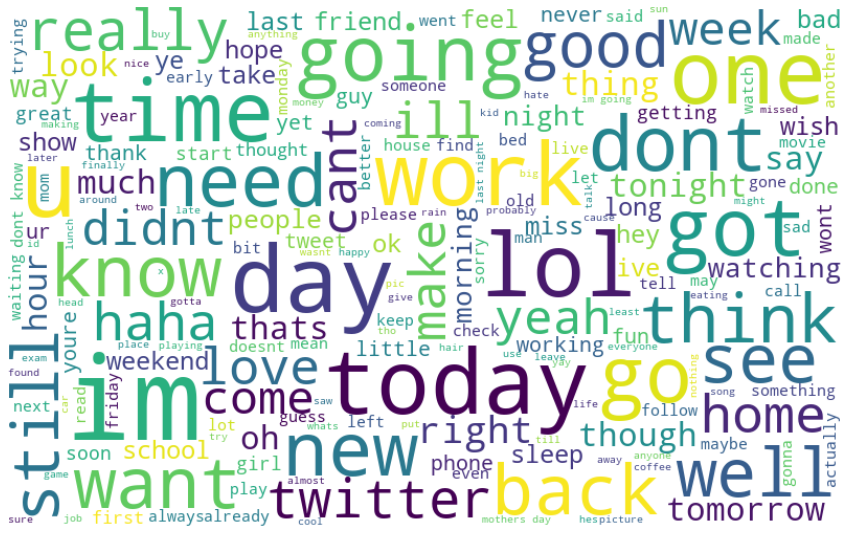

In [25]:
wordcloud = WordCloud(background_color="white",width=800, height=500, random_state=21, max_font_size=110).generate(rijeci_neutral) 

plt.figure(figsize=(15, 12)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 

<div style = "text-align:justify">Iz konstruiranih dijagrama zaključujemo da su do klasifikacije objave kao pozitivne najčešće vodile riječi <i style = "color:green">happy, good, thank, love</i>, a kao negativne <i style = "color:red">hate, sick, bad, miss</i> i <i style = "color:red">sad</i>.</div>